In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False
import warnings
warnings.filterwarnings('ignore', category= FutureWarning)

In [2]:
rnd= np.random.RandomState()
x_org= rnd.normal(size= (1000, 3))
w= rnd.normal(size= 3)

x= rnd.poisson(10 * np.exp(x_org))
y= np.dot(x_org, w)
print(x[:10,0])

[12  4  0 66 87  4 15 11  3  4]


In [3]:
 print('특성 출현 횟수: ', np.bincount(x[:, 0]))

특성 출현 횟수:  [22 46 50 63 45 49 44 57 48 39 29 34 40 20 35 21 21 20 18 22 18 11 20 14
 13 11  7 12  7  6  8 10  8  5  5  9  4  1  5  2  5  5  2  7  4  3  5  4
  4  2  3  4  0  5  0  0  1  3  1  2  2  1  3  2  0  0  2  0  2  1  2  5
  0  0  0  1  0  0  0  0  0  1  1  1  2  0  1  1  0  0  0  1  1  0  0  0
  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  1  0  0
  0  0  0  0  0  0  0  1  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

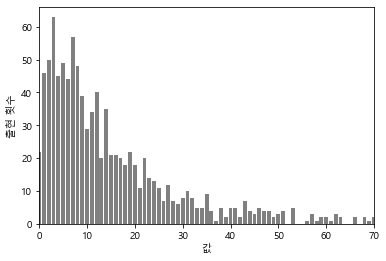

In [4]:
plt.xlim(0, 150)
plt.xlim(0, 70)
bins= np.bincount(x[:, 0])
plt.bar(range(len(bins)), bins, color= 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [5]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,
                                                   y,
                                                   random_state= 0)
score= Ridge().fit(x_train, y_train).score(x_test, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.152


In [6]:
x_train_log= np.log(x_train + 1)
x_test_log= np.log(x_test + 1)

Text(0.5, 0, '값')

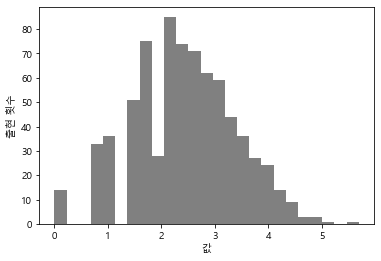

In [7]:
plt.hist(x_train_log[:, 0], bins= 25, color= 'grey')
plt.ylabel('출현 횟수')
plt.xlabel('값')

In [8]:
score= Ridge().fit(x_train_log, y_train).score(x_test_log, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.860


### 특성 자동 선택

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

In [10]:
cancer= load_breast_cancer()
# 고정된 난수 발생
rng= np.random.RandomState(42)
noise= rng.normal(size= (len(cancer.data), 50))
# 데이터에 노이즈 특성 추가
# 처음 30개는 원본 특성이고, 다음 50개는 노이즈
x_w_noise= np.hstack([cancer.data, noise])

x_train, x_test, y_train, y_test= train_test_split(x_w_noise,
                                                   cancer.target,
                                                   random_state= 0,
                                                   test_size= .5)
# f_classif와 selectpercentile을 사용하여 특성의 50%를 선택 후 학습
select= SelectPercentile(score_func= f_classif, percentile= 50).fit(x_train, y_train)
x_train_selected= select.transform(x_train)

print('x_train.shape: ', x_train.shape)
print('x_train_selected.shape: ', x_train_selected.shape)

x_train.shape:  (284, 80)
x_train_selected.shape:  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x23a5c172a60>], [Text(0, 0, '')])

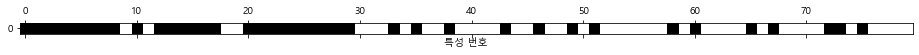

In [11]:
mask= select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap= 'gray_r')
plt.xlabel('특성 번호')
plt.yticks([0])

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
x_test_selected= select.transform(x_test)

lr= LogisticRegression(max_iter= 5000).fit(x_train, y_train)
print('전체 특성을 사용한 점수: {:.3f}'.format(lr.score(x_test, y_test)))
lr= LogisticRegression(max_iter= 5000).fit(x_train_selected, y_train)
print('선택된 일부 특성을 사용한 점수: {:.3f}'.format(lr.score(x_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.937


### 모델 기반 특성 선택

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [15]:
select= SelectFromModel(
    RandomForestClassifier(n_estimators= 100, random_state= 42),
                           threshold= 'median')

In [16]:
select.fit(x_train, y_train)
x_train_l1= select.transform(x_train)
print('x_train.shape: ', x_train.shape)
print('x_train_l1.shape: ', x_train_l1.shape)

x_train.shape:  (284, 80)
x_train_l1.shape:  (284, 40)


Text(0.5, 0, '특성 번호')

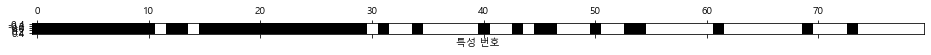

In [17]:
mask= select.get_support()
plt.matshow(mask.reshape(1, -1), cmap= 'gray_r')
plt.xlabel('특성 번호')

In [18]:
x_test_l1= select.transform(x_test)
score= LogisticRegression(max_iter= 5000).fit(x_train_l1, y_train).score(x_test_l1, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.947


### 반복적 특성 선택

In [19]:
from sklearn.feature_selection import RFE

Text(0.5, 0, '특성 번호')

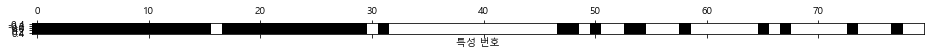

In [20]:
select= RFE(RandomForestClassifier(n_estimators= 100, random_state= 42),
            n_features_to_select= 40).fit(x_train, y_train)

mask= select.get_support()
plt.matshow(mask.reshape(1, -1), cmap= 'gray_r')
plt.xlabel('특성 번호')

In [21]:
x_train_rfe= select.transform(x_train)
x_test_rfe= select.transform(x_test)

score= LogisticRegression(max_iter= 5000).fit(x_train_rfe, y_train).score(x_test_rfe, y_test)
print('테스트 점수: {:.3f}'.format(score))

테스트 점수: 0.940


In [22]:
print('테스트 점수: {:.3f}'.format(select.score(x_test, y_test)))

테스트 점수: 0.951
